#**CORIZO**
Data Science Internship - August 2022


---

**By: Ghulam Jilani**

---



# **Major Project 2**
# **Wine Quality Analysis**
**Instructions**

Instructions
These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

# **Importing Libraries**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')



In [108]:
### Load wine quality data into Pandas
df = pd.read_csv('1613779-Red_wine_.csv')
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

## **Let’s explore the type of data present in each of the columns present in the dataset.**

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


# **Now we’ll explore the descriptive statistical measures of the dataset.**

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1598.0,46.433041,32.876249,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1598.0,3.498586,0.080346,2.74000,3.5200,3.52000,3.520000,3.90000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [111]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

## **Let’s impute the missing values by means as the data present in the different columns are continuous values.**

In [112]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())
 
df.isnull().sum().sum()

0

# **Let’s draw the histogram to visualise the distribution of the data with continuous values in the columns of the dataset.**

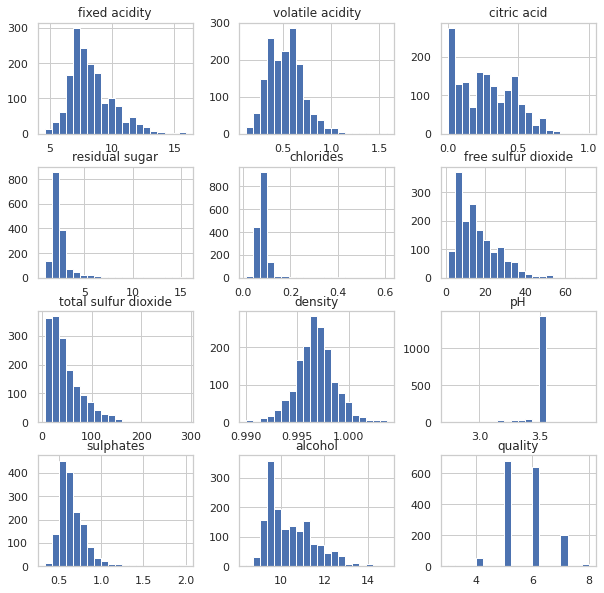

In [113]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

# **Now let’s draw the count plot to visualise the number data for each quality of wine.**

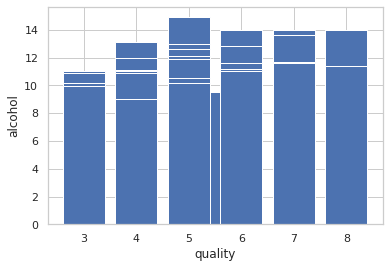

In [114]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

There are times the data provided to us contains redundant features they do not help with increasing the model’s performance that is why we remove them before using them to train our model

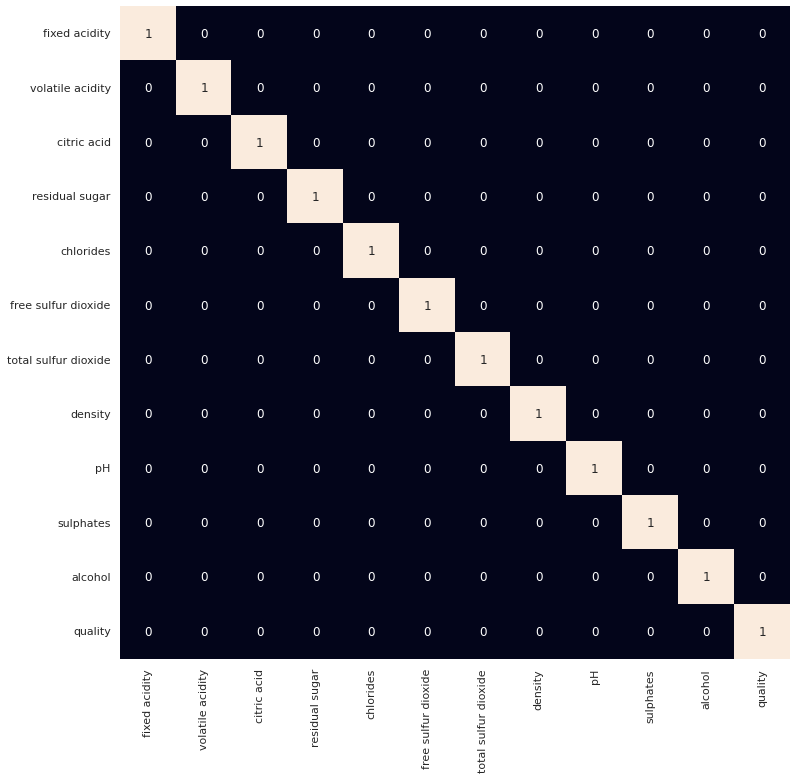

In [115]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

From the above heat map we can conclude that the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove them.

In [116]:
df = df.drop('total sulfur dioxide', axis=1)

# **Model Development**
Let’s prepare our data for training and splitting it into training and validation data so, that we can select which model’s performance is best as per the use case. We will train some of the state of the art machine learning classification models and then select best out of them using validation data.

In [117]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

We have a column with object data type as well let’s replace it with the 0 and 1 as there are only two categories.

In [118]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [119]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']
 
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)
 
xtrain.shape, xtest.shape

((1279, 10), (320, 10))

Normalising the data before training help us to achieve stable and fast training of the model.

In [120]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

As the data has been prepared completely let’s train some state of the art machine learning model on it.

In [121]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(xtrain, ytrain)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7310879263415448
Validation Accuracy :  0.7711257913570052

XGBClassifier() : 
Training Accuracy :  0.8526634370670255
Validation Accuracy :  0.7934017537650899

SVC() : 
Training Accuracy :  0.7636832175459629
Validation Accuracy :  0.7818410601234713



# **Model Evaluation**

From the above accuracies we can say that Logistic Regression and SVC() classifier performing better on the validation data with less difference between the validation and training data. Let’s plot the confusion matrix as well for the validation data using the Logistic Regression model.

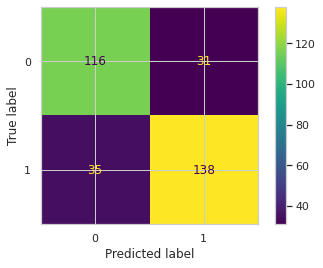

In [122]:
metrics.plot_confusion_matrix(models[1], xtest, ytest)
plt.show()

Let’s also print the classification report for the best performing model.

In [123]:
print(metrics.classification_report(ytest,
                                    models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       147
           1       0.82      0.80      0.81       173

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

